In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

from parfit.parfit import bestFit
from parfit.fit import *
from parfit.score import *
from parfit.plot import *

In [2]:
train = pd.read_csv('train.csv')
train.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,day_of_week,holiday_flg,month,year,1,...,Ōsaka-fu Sakai-shi Minamikawaramachi,Ōsaka-fu Suita-shi Izumichō,Ōsaka-fu Ōsaka-shi Fuminosato,Ōsaka-fu Ōsaka-shi Kyōmachibori,Ōsaka-fu Ōsaka-shi Kyūtarōmachi,Ōsaka-fu Ōsaka-shi Nakanochō,Ōsaka-fu Ōsaka-shi Nanbasennichimae,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu Ōsaka-shi Ōgimachi,Ōsaka-fu Ōsaka-shi Ōhiraki
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,Wednesday,0,1,2016,1,...,0,0,0,0,0,0,0,0,0,0
1,air_25e9888d30b386df,2016-01-13,21,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,Wednesday,0,1,2016,1,...,0,0,0,0,0,0,0,0,0,0
2,air_fd6aac1043520e83,2016-01-13,40,Izakaya,Tōkyō-to Minato-ku Shibakōen,Wednesday,0,1,2016,1,...,0,0,0,0,0,0,0,0,0,0
3,air_64d4491ad8cdb1c6,2016-01-13,5,Dining bar,Tōkyō-to Minato-ku Shibakōen,Wednesday,0,1,2016,1,...,0,0,0,0,0,0,0,0,0,0
4,air_ee3a01f0c71a769f,2016-01-13,18,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,Wednesday,0,1,2016,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
test.head(10)

,id,visitors,air_store_id,visit_date,air_genre_name,air_area_name,day_of_week,holiday_flg,month,year,...,Ōsaka-fu Sakai-shi Minamikawaramachi,Ōsaka-fu Suita-shi Izumichō,Ōsaka-fu Ōsaka-shi Fuminosato,Ōsaka-fu Ōsaka-shi Kyōmachibori,Ōsaka-fu Ōsaka-shi Kyūtarōmachi,Ōsaka-fu Ōsaka-shi Nakanochō,Ōsaka-fu Ōsaka-shi Nanbasennichimae,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu Ōsaka-shi Ōgimachi,Ōsaka-fu Ōsaka-shi Ōhiraki
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
1,air_0164b9927d20bcc3_2017-04-23,0,air_0164b9927d20bcc3,2017-04-23,Italian/French,Tōkyō-to Minato-ku Shibakōen,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
2,air_0241aa3964b7f861_2017-04-23,0,air_0241aa3964b7f861,2017-04-23,Izakaya,Tōkyō-to Taitō-ku Higashiueno,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
3,air_0328696196e46f18_2017-04-23,0,air_0328696196e46f18,2017-04-23,Dining bar,Ōsaka-fu Ōsaka-shi Nakanochō,Sunday,0,4,2017,...,0,0,0,0,0,1,0,0,0,0
4,air_034a3d5b40d5b1b1_2017-04-23,0,air_034a3d5b40d5b1b1,2017-04-23,Cafe/Sweets,Ōsaka-fu Ōsaka-shi Ōhiraki,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,1
5,air_036d4f1ee7285390_2017-04-23,0,air_036d4f1ee7285390,2017-04-23,Cafe/Sweets,Hyōgo-ken Takarazuka-shi Tōyōchō,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
6,air_0382c794b73b51ad_2017-04-23,0,air_0382c794b73b51ad,2017-04-23,Cafe/Sweets,Tōkyō-to Setagaya-ku Okusawa,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
7,air_03963426c9312048_2017-04-23,0,air_03963426c9312048,2017-04-23,Izakaya,Hiroshima-ken Hiroshima-shi Kokutaijimachi,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
8,air_04341b588bde96cd_2017-04-23,0,air_04341b588bde96cd,2017-04-23,Izakaya,Tōkyō-to Nerima-ku Toyotamakita,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0
9,air_049f6d5b402a31b2_2017-04-23,0,air_049f6d5b402a31b2,2017-04-23,Japanese food,Fukuoka-ken Fukuoka-shi Daimyō,Sunday,0,4,2017,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.shape

(32019, 137)

In [5]:
indice = [str(i) for i in range(1,13)]
indice.remove('4')
indice.remove('5')
indice

['1', '2', '3', '6', '7', '8', '9', '10', '11', '12']

In [6]:
for i in indice:
    test[i] = 0
test.columns

Index(['id', 'visitors', 'air_store_id', 'visit_date', 'air_genre_name',
       'air_area_name', 'day_of_week', 'holiday_flg', 'month', 'year',
       ...
       '1', '2', '3', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object', length=147)

In [7]:
train['visit_date'] = pd.to_datetime(train['visit_date'], infer_datetime_format=False)

### Trial

In [8]:
temp = train[train['air_store_id'] == 'air_049f6d5b402a31b2']
temp.shape

(258, 147)

In [9]:
temp = temp[(temp['visit_date'] > '2016') & (temp['visit_date'] < '2018')]

In [10]:
cutout = temp[['visit_date','visitors']]

In [11]:
cutout = cutout.set_index('visit_date')
cutout.sort_index(ascending=True, inplace=True)

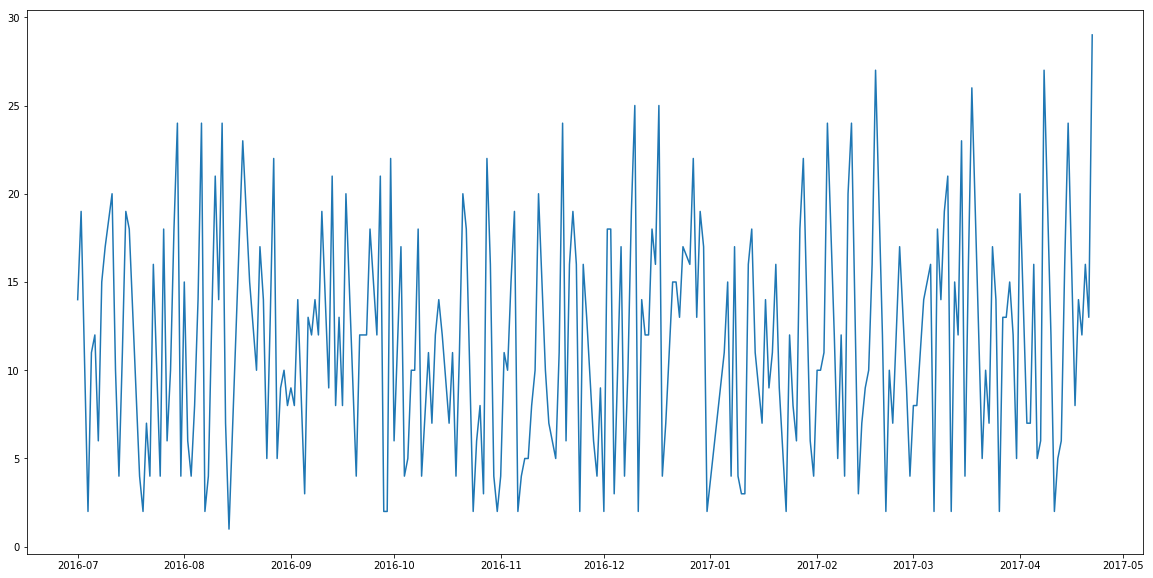

In [12]:
plt.figure(figsize=(20,10))
plt.plot(cutout)
plt.show()

### Visitors by date

In [13]:
some = train[['visit_date','visitors']]
some.head()

,visit_date,visitors
0,2016-01-13,25
1,2016-01-13,21
2,2016-01-13,40
3,2016-01-13,5
4,2016-01-13,18


In [14]:
know = some.groupby(['visit_date'])['visitors'].mean()
know.head()

visit_date
2016-01-01    21.520833
2016-01-02    28.000000
2016-01-03    29.234568
2016-01-04    21.184713
2016-01-05    17.000000
Name: visitors, dtype: float64

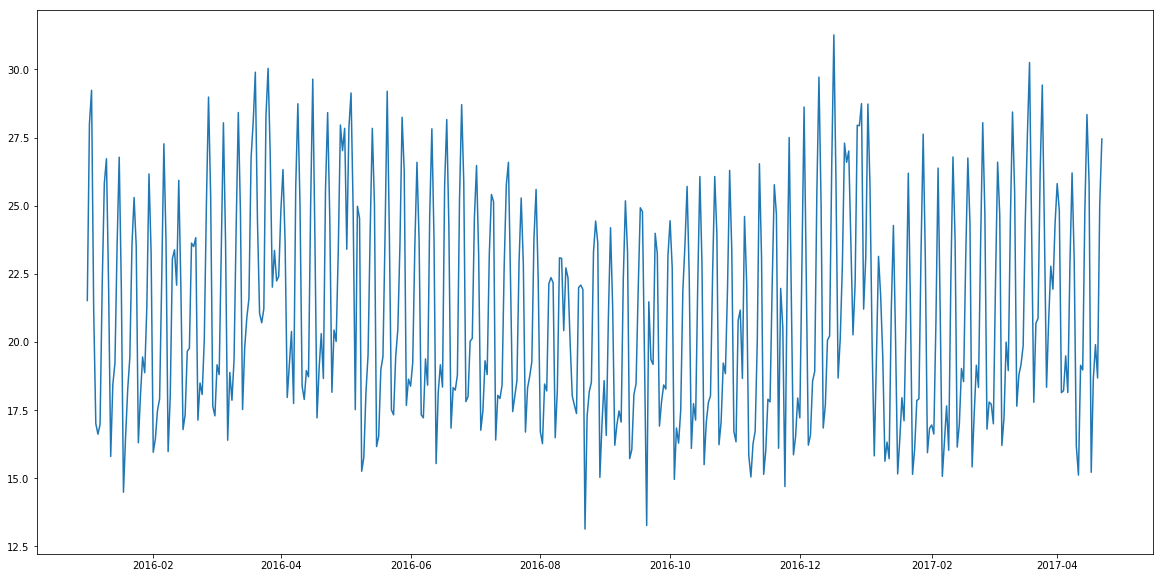

In [15]:
plt.figure(figsize=(20,10))
plt.plot(know)
plt.show()

### Visitors by day

In [16]:
ohno = train[['day_of_week','visitors']]
ohno.head()

,day_of_week,visitors
0,Wednesday,25
1,Wednesday,21
2,Wednesday,40
3,Wednesday,5
4,Wednesday,18


In [17]:
puff = ohno.groupby(['day_of_week'])['visitors'].mean()
puff

day_of_week
Friday       23.072737
Monday       17.177009
Saturday     26.313688
Sunday       23.873362
Thursday     18.922702
Tuesday      17.672137
Wednesday    19.230121
Name: visitors, dtype: float64

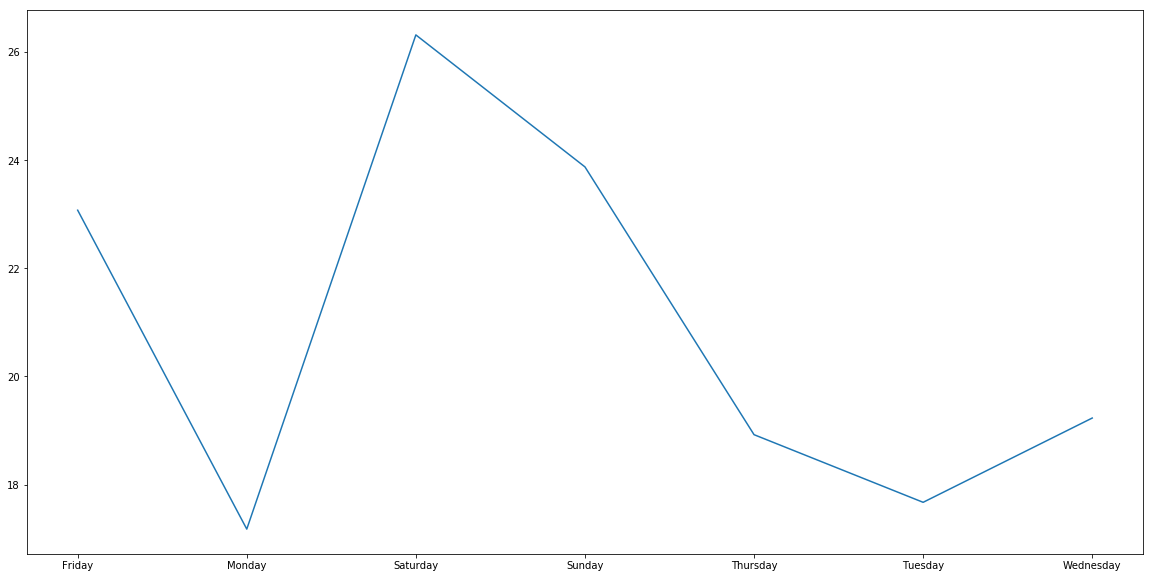

In [18]:
plt.figure(figsize=(20,10))
plt.plot(puff)
plt.show()

### Visitors by month

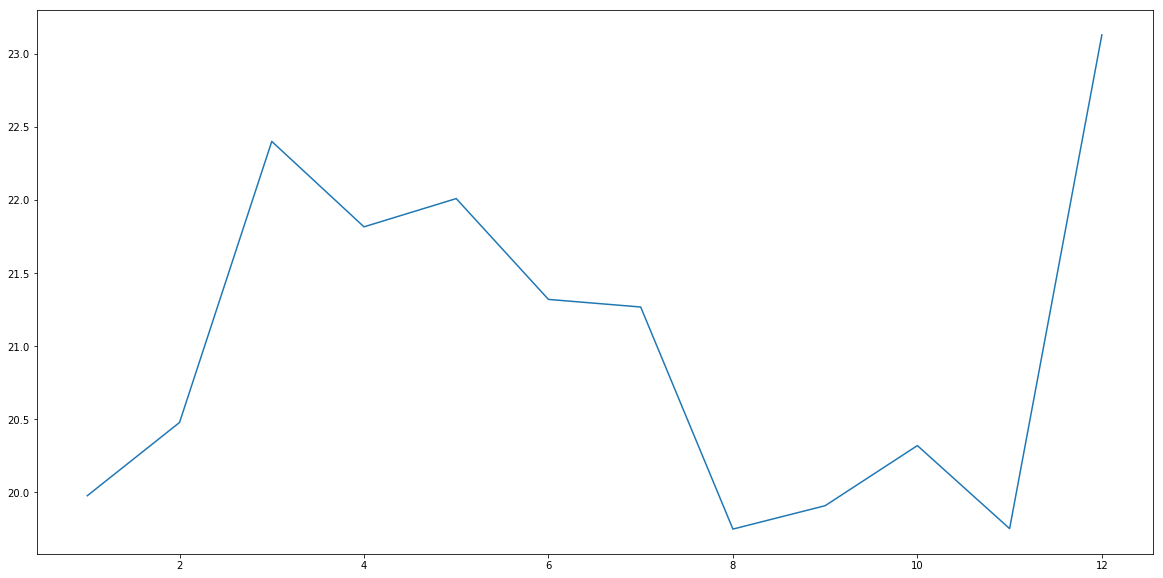

In [19]:
nono = train[['month','visitors']]

hfive = nono.groupby(['month'])['visitors'].mean()

plt.figure(figsize=(20,10))
plt.plot(hfive)
plt.show()

###  Visitors by day of month

In [20]:
kanuu = train[['visit_date','visitors']]
kanuu['day'] = 0
for i, row in kanuu.iterrows():
    kanuu.at[i, 'day'] = row['visit_date'].day

/home/anuj8june/python3env/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
kanuu.dtypes

visit_date    datetime64[ns]
visitors               int64
day                    int64
dtype: object

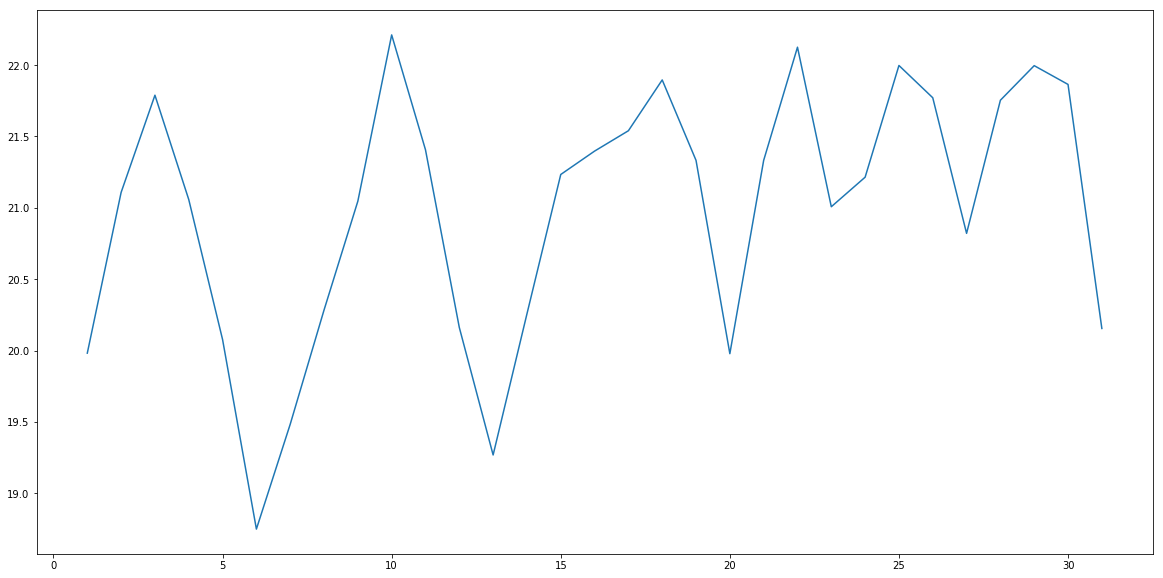

In [22]:
oomph = kanuu.groupby(['day'])['visitors'].mean()

plt.figure(figsize=(20,10))
plt.plot(oomph)
plt.show()

### Effect of holiday

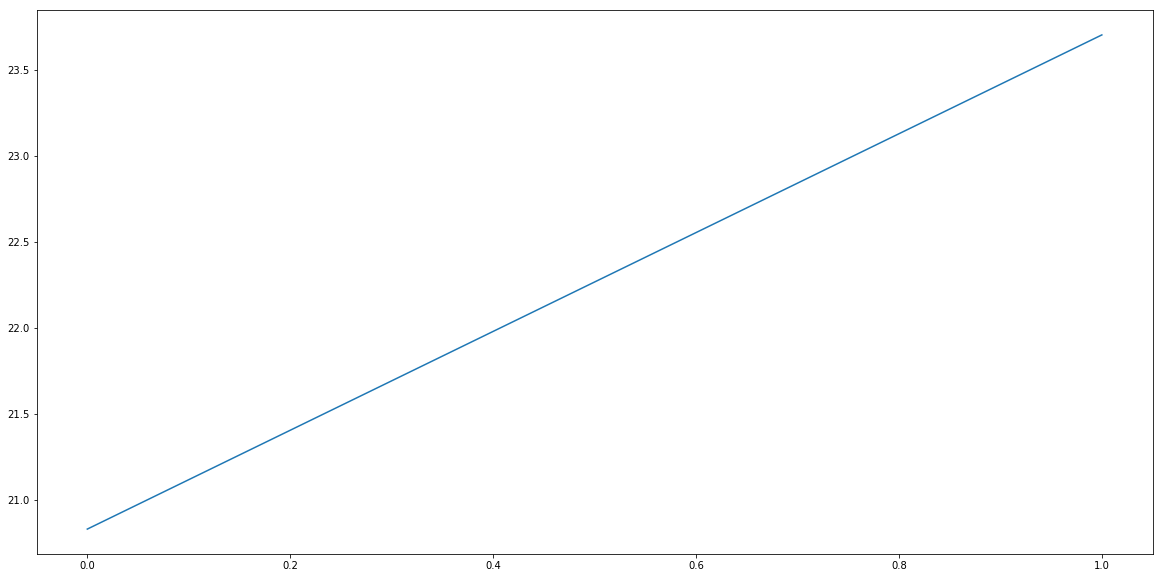

In [23]:
ahh = train[['holiday_flg','visitors']]

real = ahh.groupby(['holiday_flg'])['visitors'].mean()

plt.figure(figsize=(20,10))
plt.plot(real)
plt.show()

In [24]:
cols = train.columns.tolist()
rem = ['air_genre_name','air_area_name','day_of_week','month','year']
select = list()
for val in cols:
    if val not in rem:
        select.append(val)
select = select[:25]
dtt = train[select]

In [25]:
dtt.columns.tolist()

['air_store_id',
 'visit_date',
 'visitors',
 'holiday_flg',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '2016',
 '2017',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday']

In [26]:
cols_list = dtt.columns.tolist()
cols_list.remove('2016')
cols_list = cols_list + ['id']
cols_list

['air_store_id',
 'visit_date',
 'visitors',
 'holiday_flg',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '2017',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'id']

In [27]:
temper = test[cols_list]
temper.head()

,air_store_id,visit_date,visitors,holiday_flg,1,2,3,4,5,6,...,12,2017,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,id
0,air_00a91d42b08b08d9,2017-04-23,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,air_00a91d42b08b08d9_2017-04-23
1,air_0164b9927d20bcc3,2017-04-23,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,air_0164b9927d20bcc3_2017-04-23
2,air_0241aa3964b7f861,2017-04-23,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,air_0241aa3964b7f861_2017-04-23
3,air_0328696196e46f18,2017-04-23,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,air_0328696196e46f18_2017-04-23
4,air_034a3d5b40d5b1b1,2017-04-23,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,air_034a3d5b40d5b1b1_2017-04-23


In [28]:
temper['2016'] = 0

/home/anuj8june/python3env/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
temper.columns.tolist()

['air_store_id',
 'visit_date',
 'visitors',
 'holiday_flg',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '2017',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'id',
 '2016']

### First tree

In [40]:
arr = test['air_store_id'].unique().tolist()
arr = arr[0:2]
arr

['air_00a91d42b08b08d9', 'air_0164b9927d20bcc3']

In [44]:
trials = arr
for val in trials:
    temp = dtt[dtt['air_store_id'] == val]
    temp = temp.sort_values('visit_date')
    temp.index = range(len(temp))
    X = temp[temp.columns.tolist()[3:]]
    y = temp['visitors']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    rf_grid = {
    'n_estimators': [1,3,5,7],
    'min_samples_leaf': [3,5,7,9,11,13,15,20,25,30,35,40,45,50],
    'max_features': [3,5,7,9,11,13,15,17,20],
    'n_jobs': [-1]
    }
    rf_paramGrid = ParameterGrid(rf_grid)


    rf_models = fitModels(RandomForestRegressor, rf_paramGrid, X_train, y_train)
    rf_scores = scoreModels(rf_models, X_val, y_val, mean_squared_log_error, 'predict')


    array = [i**0.5 for i in rf_scores]
    model = rf_models[array.index(min(array))]
    
    
    temp1 = temper[temper['air_store_id'] == val]
    some_col = ['holiday_flg', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '2017', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '2016']
    X_p = temp1[some_col]
    
    rfc = model
    rfc.fit(X,y)
    X_p['visitors'] = rfc.predict(X_p)
    
    for i, row in X_p.iterrows():
        test.at[i,'visitors'] = row['visitors']
    print(model)
    print(min(array))
    

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1260s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elap

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=17, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
0.334443868383


/home/anuj8june/python3env/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1230s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
0.731436477914


/home/anuj8june/python3env/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
